In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
train = pd.read_csv("train.csv")
gender =  pd.read_csv("gender_submission.csv")

In [8]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
gender.head(2)

,PassengerId,Survived
0,892,0
1,893,1


# Check for missing data in each df

In [10]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Trace it aslo by using heat map

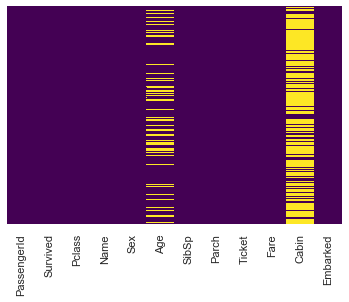

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

#similarly for test data

In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

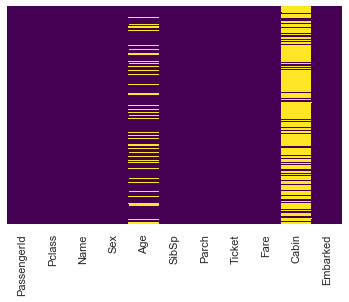

In [21]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

so here we could see that gender has no missing values and in train and test data columns 'Age','Cabin','Embarked' has missing values.

# Check for duplicate rows

In [22]:
test.duplicated().sum()

0

In [24]:
train.duplicated().sum()

0

In [25]:
gender.duplicated().sum()

0

So there are no duplicate rows in test,train and gender data overall by tearms of whole row

So Check for duplicate rows based on unqiue columns

In [27]:
train.duplicated(['PassengerId','Name']).sum()

0

In [28]:
test.duplicated(['PassengerId','Name']).sum()

0

# Bar chart on features😊😊😊

The features in this dataset are mainly

1)Pclasss

2)Sex

3)SibSp(#Number of siblings and Spouse)

4)Parch(#Number of parents and children)

5)Age

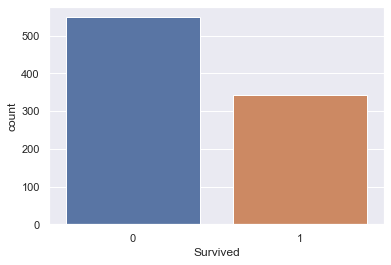

In [30]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data = train)

Here based on the survived column in train data we are just seeong how many surved and how many not.

1) From the above plot,one can infere that 0-> didn't survive and 1- survived.

2) Count of people who didn't survive are more than people who survived.

3) Around 550 people didn't survive and around 340 people survived.

# Analysis Based on Sex👩🏻👨🏻

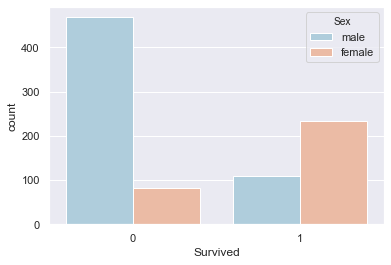

In [32]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',hue ='Sex',data = train , palette ='RdBu_r')

we have added an extra constraint to segregate the data of people who survived based on sex column.

#blue -> males and Red -> female

#so there are around 470 men and less than 80 women who didn't survive

#around 110 and 230 men and women who survived respectively

# Analysis Based on Class🚗🛵🚲

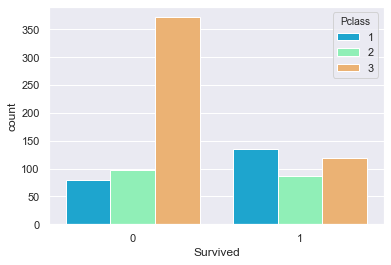

In [34]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train , palette = 'rainbow')

we segregated data based on passenger class i.e. 1,2 &3 . So we could infere from here that people from 3rd class are people who didn't survive in majority people who survive most are from passenger class 1

# Find the distribution of age🧓🏻👩🏻👧🏻🧒🏻

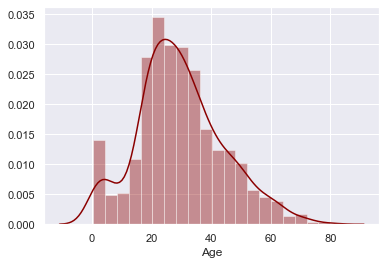

In [37]:
sns.distplot(train['Age'].dropna(),kde=True,color = 'darkred',bins =20)

observation with Age and Pclass

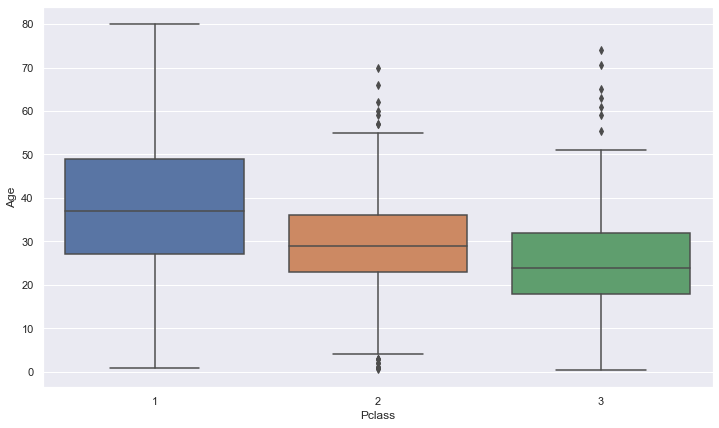

In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

From the Box plot on Train data we could figure out that majority of people who are in first class are the age gap of 28-48
#for 2nd class people are in gap of 25-35 yrs
#for 3rd class people are in 18-32 yrs
#considering the 50th percentile in each class we are filling the missing values

In [39]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [40]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis =1)
test['Age'] = test[['Age','Pclass']].apply(impute_age , axis =1)

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

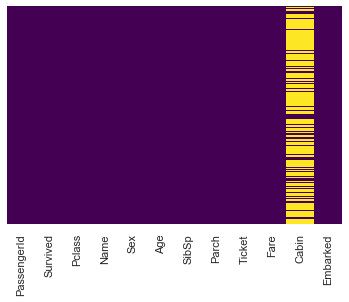

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

In [43]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

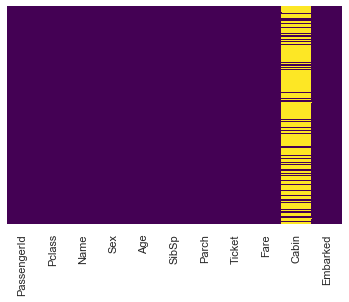

In [44]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

# Analysis Based On Parch(Parent And Children)👨‍👩‍👧‍👦

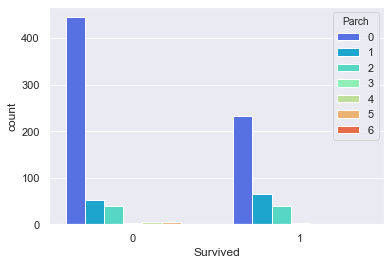

In [45]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue = 'Parch',data = train , palette = 'rainbow')

Here from this plot we can see that people with '0' parents and childrens are the ones who didn't survive in majority
But similarly there is no significant difference among the strength of people who survived and who didn't, who were having two or more parents and children

# Analysis Based On SibSp(Siblings and Spouse)👨‍👩‍👧‍👦

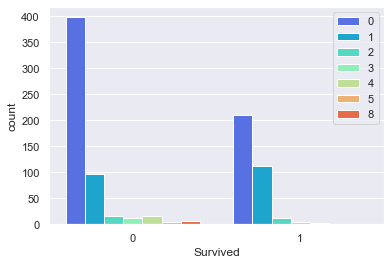

In [47]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived' , hue = 'SibSp' ,data = train, palette = 'rainbow' )
plt.legend(loc='upper right')

From the above plot we see that people with '0' Spouse and Sibling are the ones who didn't survive
People who did survive had around 110 individuals who had single spouse/sibling and around 20 individuals have 2 spouse/sibiling

In [48]:
train_test_data = [train , test]

for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract( '([A-Za-z]+)\.', expand = False)

In [49]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Jonkheer      1
Countess      1
Sir           1
Ms            1
Lady          1
Don           1
Mme           1
Name: Title, dtype: int64

# Title Mapping

Mr : 0

Miss : 1

Mrs : 2

others : 3

In [50]:
title_mapping = { "Mr" :0 , "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 } 
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [51]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [52]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


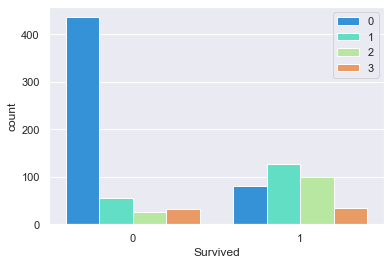

In [53]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived' , hue = 'Title' ,data = train, palette = 'rainbow' )
plt.legend(loc='upper right')


0 --> stands for Mr who didn't survive in majority rather than the people who survived

In [54]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [55]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

# Mapping of Sex

male : 0

female :1

In [56]:
sex_mapping = {"male" : 0 , "female" : 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [57]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [58]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


# Embarked

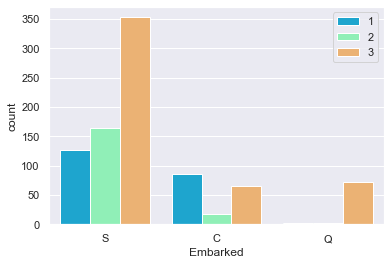

In [59]:
sns.set_style('darkgrid')
sns.countplot(x= 'Embarked' , hue = 'Pclass' ,data = train, palette = 'rainbow' )
plt.legend(loc='upper right')

From this plot we can understand that majority of all three classes i.e. pclass 1,2 and 3 were from S embark.
So we can fill out the missing values in Embark Feature with S

In [60]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [61]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [62]:
embark_mapping = {'S' :0 ,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=  dataset['Embarked'].map(embark_mapping)

In [63]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,0,2


In [64]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


# Fare

In [65]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

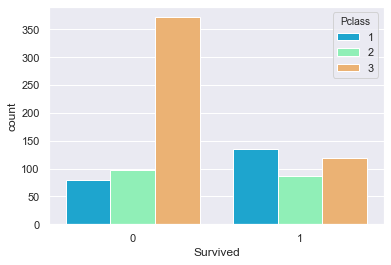

In [66]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train , palette = 'rainbow')

In [67]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [68]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


# Cabin

In [69]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F2             3
              ..
A7             1
A26            1
C82            1
E34            1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [70]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

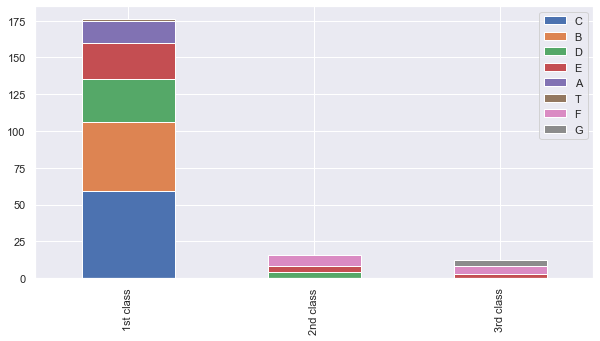

In [71]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [72]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [73]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# Encoding of age

Binning/Converting Numerical Age to Categorical Variable

feature vector map:

child: 0

young: 1

adult: 2

mid-age: 3

senior: 4

In [74]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [75]:
train =train.drop('Ticket',axis=1)

In [76]:
test =test.drop('Ticket',axis=1)

# Statistical Modelling

In [77]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [78]:
trainML = train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Title']]

# Regression on survival on Age

In [79]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [80]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

c:\users\ashwini\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6161616161616161

The prediction accuracy is marginally better than the base line accuracy of 61.5%

# Regression on survival on Fare

In [81]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

c:\users\ashwini\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6588103254769921

The prediction accuracy got a bit better than the Age variable and much better than 65% base accuracy

# Regression on survive on Sex(using a Categorical Variable)

In [82]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

c:\users\ashwini\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7867564534231201

The gender of passenger is a strong predictor and purely predciting based on gender, the model accuracy increased to 78%

# Predicting Survival based on Random forest model

In [84]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age','Title', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

c:\users\ashwini\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9012345679012346

Random forest did a good job in predicting the survival with a 90%  accuracy